In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sb

In [30]:
#dataset loading
df=pd.read_csv('https://raw.githubusercontent.com/lastoptn/datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
#Independent and Dependent Features
feature_cols= df.columns[:-1]
X=df[feature_cols]
y=df['Outcome']
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [32]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
663            9      145             80             46      130  37.9   
712           10      129             62             36        0  41.2   
161            7      102             74             40      105  37.2   
509            8      120             78              0        0  25.0   
305            2      120             76             37      105  39.7   
..           ...      ...            ...            ...      ...   ...   
645            2      157             74             35      440  39.4   
715            7      187             50             33      392  33.9   
72            13      126             90              0        0  43.4   
235            4      171             72              0        0  43.6   
37             9      102             76             37        0  32.9   

     DiabetesPedigreeFunction  Age  
663                     0.637   40  
712                     0.441   38  


In [33]:
#Decision Tree Classifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [35]:
#Confusion Matrix and classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[75 24]
 [25 30]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        99
           1       0.56      0.55      0.55        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



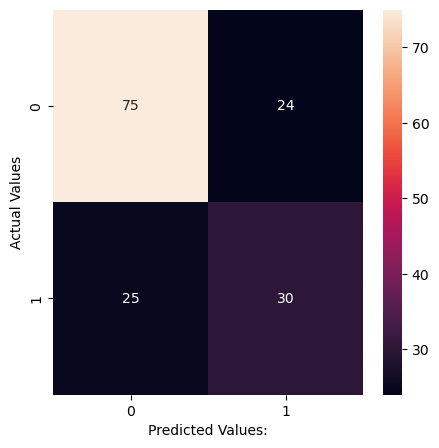

In [37]:
#heatmap
fig, ax=plt.subplots(figsize=(5,5))
sb.heatmap(cm,annot=True,ax=ax)
plt.xlabel("Predicted Values:")
plt.ylabel("Actual Values")
plt.show()



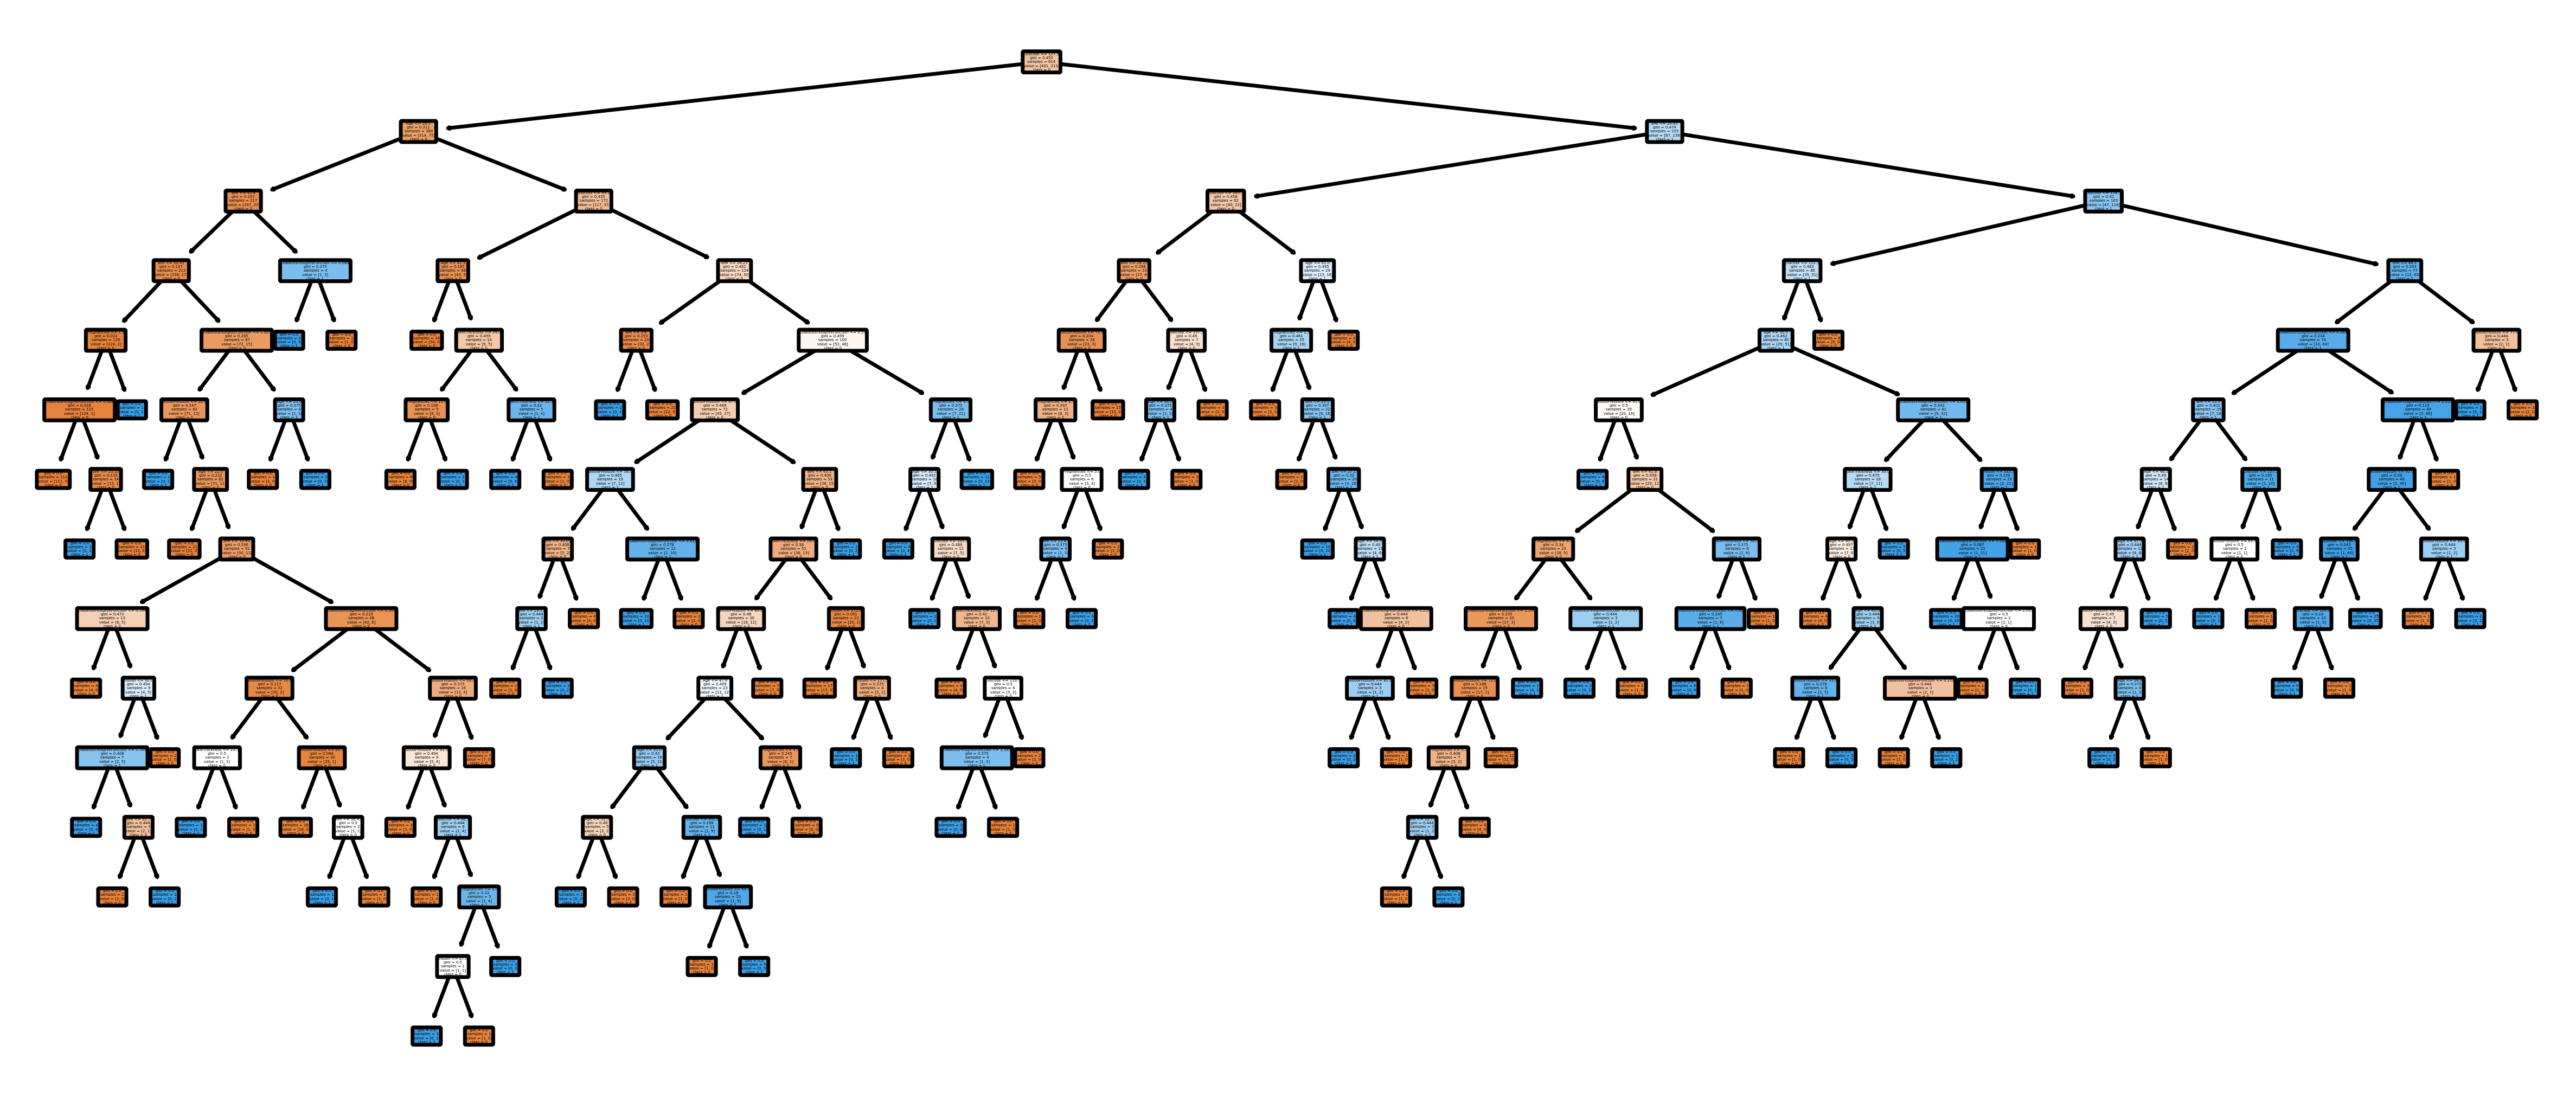

In [39]:
#plotting tree
plt.figure(figsize=(12,5),dpi=500)
tree.plot_tree(clf,feature_names=feature_cols,class_names=["0","1"],filled=True,rounded=True)
plt.savefig('dtree.png')
